In [11]:
import numpy as np
import cv2
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from numpy import savetxt
import shutil
from tensorflow import keras
import tensorflow as tf
from tqdm import tqdm

from keras.metrics import mean_squared_error as mse

tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


<br><br>
## MSE for 4700 normal images with k=3

In [55]:
path = glob.glob("D:/5FH/ML/images/clean-normal-small-clustered-centers-3/*.npy")
mse_0_1 = []
mse_0_2 = []
for file in tqdm(path):
    X = np.load(file)
    means = np.mean(X, axis=1)
    sorted_means = np.sort(means)
    sorted_clusters = []
    for i in range(0,3):
        for j in range(0,3):
            if sorted_means[i] == means[j]:
                sorted_clusters.append(X[j])
                break
    mse_0_1.append(int(mse(sorted_clusters[0], sorted_clusters[1])))
    mse_0_2.append(int(mse(sorted_clusters[0], sorted_clusters[2])))

100%|█████████████████████████████████████████████████████████████████████████████| 4636/4636 [00:07<00:00, 591.44it/s]


In [44]:
print(len(mse_0_1))
print(len(mse_0_2))

print(np.amax(mse_0_1))
print(np.amax(mse_0_2))
mse_0_1 = np.asarray(mse_0_1)
mse_0_2 = np.asarray(mse_0_2)

print(len(mse_0_1 [mse_0_1 > 2600]))
print(len(mse_0_2 [mse_0_2 > 12000]))

4636
4636
5500
14341
231
176


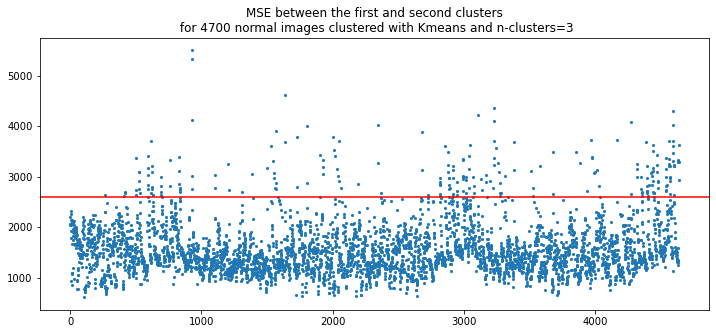

In [39]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

x = range(len(mse_0_1))
y = mse_0_1
ax.set_title("MSE between the first and second clusters\n for 4700 normal images clustered with Kmeans and n-clusters=3")
ax.scatter(x, y, marker='.',  linewidths=0.1)
ax.axhline(y = 2600, color = 'r', linestyle = '-')
plt.show()

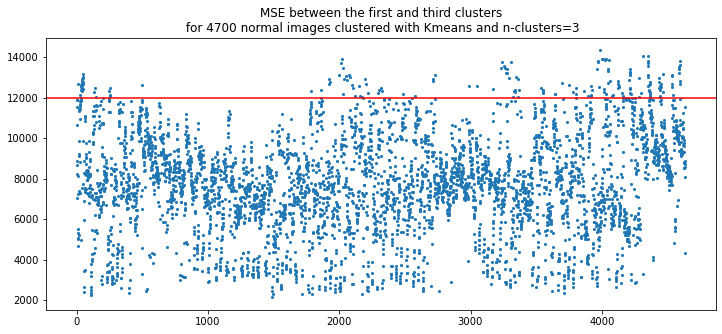

In [45]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

x = range(len(mse_0_2))
y = mse_0_2
ax.set_title("MSE between the first and third clusters\n for 4700 normal images clustered with Kmeans and n-clusters=3")
ax.scatter(x, y, marker='.',  linewidths=0.1)
ax.axhline(y = 12000, color = 'r', linestyle = '-')
plt.show()


<br><br>
## MSE for 6200 fail images with k=3

In [46]:
path = glob.glob("D:/5FH/ML/images/clean-fail-clustered-centers-3/*.npy")
mse_fail_0_1 = []
mse_fail_0_2 = []
for file in tqdm(path):
    X = np.load(file)
    means = np.mean(X, axis=1)
    sorted_means = np.sort(means)
    sorted_clusters = []
    for i in range(0,3):
        for j in range(0,3):
            if sorted_means[i] == means[j]:
                sorted_clusters.append(X[j])
                break
    mse_fail_0_1.append(int(mse(sorted_clusters[0], sorted_clusters[1])))
    mse_fail_0_2.append(int(mse(sorted_clusters[0], sorted_clusters[2])))

100%|████████████████████████████████████████████████████████████████████████████| 6191/6191 [00:04<00:00, 1355.91it/s]


In [48]:
print(len(mse_fail_0_1))
print(len(mse_fail_0_2))

print(np.amin(mse_fail_0_1))
print(np.amin(mse_fail_0_2))
mse_fail_0_1 = np.asarray(mse_fail_0_1)
mse_fail_0_2 = np.asarray(mse_fail_0_2)
th = 2600
print(len(mse_fail_0_1 [mse_fail_0_1 < th]))
print(len(mse_fail_0_2 [mse_fail_0_2 < 12000]))
print(len(mse_0_1 [mse_0_1 > th]))
acc = (len(mse_fail_0_1) - len(mse_fail_0_1 [mse_fail_0_1 < th]) ) / len(mse_fail_0_1) * 100
acc_2 = (len(mse_0_1) - len(mse_0_1 [mse_0_1 > th]) ) / len(mse_0_1) * 100
print(acc)
print(acc_2)

6191
6191
1951
6147
32
2083
231
99.48312065902117
95.01725625539258


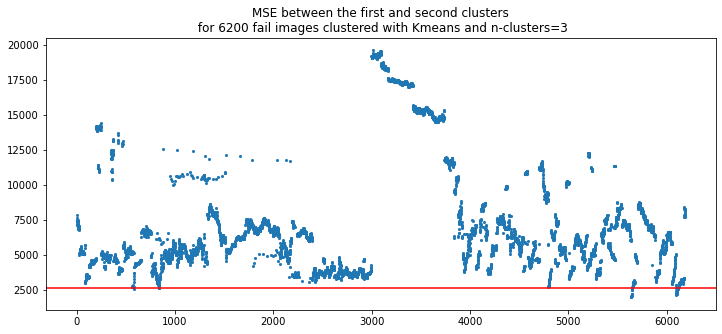

In [38]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

x = range(len(mse_fail_0_1))
y = mse_fail_0_1
ax.set_title("MSE between the first and second clusters\n for 6200 fail images clustered with Kmeans and n-clusters=3")
ax.scatter(x, y, marker='.',  linewidths=0.1)
ax.axhline(y = 2600, color = 'r', linestyle = '-')
plt.show()

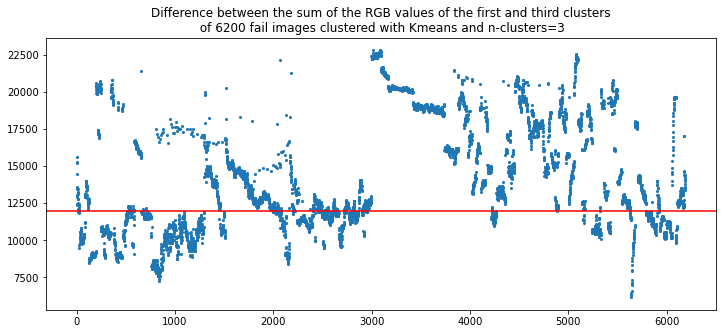

In [49]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

x = range(len(mse_fail_0_2))
y = mse_fail_0_2
ax.set_title("Difference between the sum of the RGB values of the first and third clusters\n of 6200 fail images clustered with Kmeans and n-clusters=3")
ax.scatter(x, y, marker='.',  linewidths=0.1)
ax.axhline(y = 12000, color = 'r', linestyle = '-')
plt.show()